In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import glob
import time

In [275]:
def load_imgs(path, resize_small=False):
    start = time.time()
    
    # mapping categories to integers
    category_dict = {'Forest':0, 'Bedroom':1, 'Office':2, 'Highway':3, 'Coast':4, 'InsideCity':5,
                   'TallBuilding':6, 'Industrial':7, 'Street':8, 'LivingRoom':9, 'Suburb':10,
                   'Mountain':11, 'Kitchen':12, 'OpenCountry':13, 'Store':14}
    
    join_path = os.path.join(path, '*')
    class_path = glob.glob(join_path, recursive=True)
    cls = [path.split('/')[-1] for path in class_path]
    
    cls_path = []  # get the path of the images for all classes

    for c in cls:
        cls_path.append(glob.glob(os.path.join(path, c, '*.jpg'), recursive=True))
    
    imgs = []
    labels = []
    
    for cls_p in cls_path:
        img = []
        cls_name = cls_p[0].split('/')[-2]
        labels += [category_dict[cls_name]] * len(cls_p)
        for img_path in cls_p:
            tmp_img = cv2.imread(img_path, 0)
            if resize_small:
                tmp_img = cv2.resize(tmp_img, dsize=(16, 16))
            else:
                tmp_img = cv2.resize(tmp_img, dsize=(256, 256))  # resize to equal-size
            img.append(tmp_img.flatten())
        imgs += img
        
    
    end = time.time()
    print("It takes", end-start, "seconds to load the images.")
    
    return np.array(imgs).astype(np.float32), np.array(labels).astype(np.float32).reshape(-1, 1), np.array(cls)
#     return np.array(imgs), np.array(labels), np.array(cls)

In [282]:
def show_img(X, cls, cls_num=15, samples_num=100, size=16, nrows=3, ncols=5):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 8))
    for i in range(cls_num):
        x = i // ncols
        y = i % ncols
        ax[x][y].set_title(cls[i])
        ax[x][y].imshow(X[samples_num*i].reshape(size, size), cmap='gray')

    plt.tight_layout()
    plt.subplots_adjust(hspace=-0.6)

## Tiny image representation + nearest neighbor classifier
- ref: [knn opencv](https://docs.opencv.org/3.4/d5/d26/tutorial_py_knn_understanding.html)

It takes 2.0582070350646973 seconds to load the images.
It takes 0.27762579917907715 seconds to load the images.


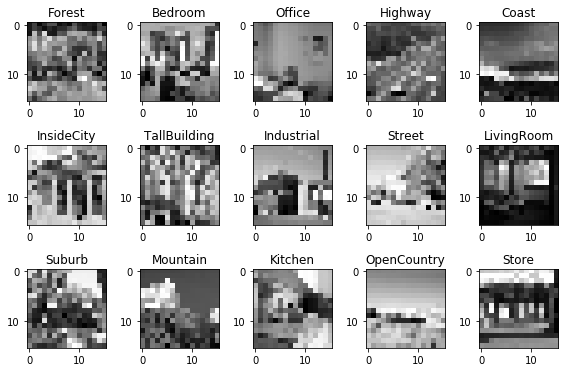

In [286]:
resize_small = True
X_train, y_train, cls_train = load_imgs('./data/train', resize_small=resize_small)
X_test, y_test, cls_test = load_imgs('./data/test', resize_small=resize_small)
if resize_small:
    show_img(X_test, cls_test, samples_num=10, size=16)
else:
    show_img(X_test, cls_test, samples_num=10, size=256)

In [287]:
knn = cv2.ml.KNearest_create()
knn.train(X_train, cv2.ml.ROW_SAMPLE, y_train)
ret, results, neighbours, dist = knn.findNearest(X_test, 3)

acc = (y_test == results).mean()
print("Accuracy:", acc)

Accuracy: 0.146666666667


## Bag of SIFT representation + nearest neighbor classifier

In [107]:
def bow_sift(imgs):
    sift = cv2.xfeatures2d.SIFT_create()
#     kp, des = sift.detectAndCompute(imgs,None)
#     sift = cv2.DescriptorExtractor_create("SIFT")
    bowDiction = cv2.BOWImgDescriptorExtractor(sift, cv2.BFMatcher(cv2.NORM_L2))
    
    return bowDiction

In [ ]:
resize_small = False
X_train, y_train, cls_train = load_imgs('./data/train', resize_small=resize_small)
X_test, y_test, cls_test = load_imgs('./data/test', resize_small=resize_small)

In [113]:
bowDiction = bow_sift(X_train)
bowDiction.descriptorType()

5